In [1]:
import pandas as pd
import numpy as np
import pgmpy

In [2]:
df = pd.read_csv("../Final_Data_Combined.csv", index_col=0)
print(df.shape)
df.head()

(23860, 17)


,Country,Date,school_closures,workplace_closures,cancel_public_events,restrict_public_gathering,closure_public_transport,SHN_requirement,restriction_internal_movement,internation_travel_control,PI_Campaign,testing_policy,contact_tracing,Facial_Covering,Vaccine_policy,Confirmed_cases,Confirmed_Deathes
0,China,2020-05-02,2G,1G,1G,3G,0,0,1G,4.0,2G,3.0,2.0,2G,0,991.0,6.0
1,China,2020-05-03,2G,1G,1G,3G,0,0,1G,4.0,2G,3.0,2.0,2G,0,991.0,6.0
2,China,2020-05-04,2G,1G,1G,3G,0,0,1G,4.0,2G,3.0,2.0,2G,0,991.0,6.0
3,China,2020-05-05,2G,1G,1G,3G,0,0,1G,4.0,2G,3.0,2.0,2G,0,991.0,6.0
4,China,2020-05-06,2G,1G,1G,3G,0,0,1G,4.0,2G,3.0,2.0,2G,0,991.0,6.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23860 entries, 0 to 24011
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        23860 non-null  object 
 1   Date                           23860 non-null  object 
 2   school_closures                23860 non-null  object 
 3   workplace_closures             23860 non-null  object 
 4   cancel_public_events           23860 non-null  object 
 5   restrict_public_gathering      23860 non-null  object 
 6   closure_public_transport       23860 non-null  object 
 7   SHN_requirement                23860 non-null  object 
 8   restriction_internal_movement  23860 non-null  object 
 9   internation_travel_control     23860 non-null  float64
 10  PI_Campaign                    23860 non-null  object 
 11  testing_policy                 23860 non-null  float64
 12  contact_tracing                23860 non-null 

In [4]:
df.Country.unique()

array(['China', 'Hong Kong', 'Indonesia', 'Malaysia', 'Singapore'],
      dtype=object)

In [5]:
df["Date"] = pd.to_datetime(df["Date"])

In [6]:
df = df.sort_values(by="Date")
df.head()

,Country,Date,school_closures,workplace_closures,cancel_public_events,restrict_public_gathering,closure_public_transport,SHN_requirement,restriction_internal_movement,internation_travel_control,PI_Campaign,testing_policy,contact_tracing,Facial_Covering,Vaccine_policy,Confirmed_cases,Confirmed_Deathes
0,China,2020-05-02,2G,1G,1G,3G,0,0,1G,4.0,2G,3.0,2.0,2G,0,991.0,6.0
22011,Indonesia,2020-05-02,3G,3T,2T,4T,1T,2T,2G,4.0,2G,1.0,1.0,4G,0,10843.0,831.0
21344,Hong Kong,2020-05-02,3G,2G,2G,4G,0,1G,0,4.0,2G,2.0,2.0,1G,0,1039.0,4.0
20677,China,2020-05-02,3T,2T,2T,4T,0,1T,1T,3.0,2G,3.0,2.0,2G,0,82875.0,4633.0
20010,China,2020-05-02,1G,2G,1G,1G,0,1G,1G,4.0,2G,2.0,2.0,2G,0,1268.0,1.0


In [7]:
df.replace("Hong Kong", "Hong_Kong", inplace=True)

In [8]:
df.Country.unique()

array(['China', 'Indonesia', 'Hong_Kong', 'Malaysia', 'Singapore'],
      dtype=object)

In [9]:
for c in df.Country.unique():
    exec(f"df_{c} = df[df.Country == \"{c}\"]")
    eval(f"print(\"Size of df_{c}\",df_{c}.shape)")

Size of df_China (21199, 17)
Size of df_Indonesia (667, 17)
Size of df_Hong_Kong (666, 17)
Size of df_Malaysia (661, 17)
Size of df_Singapore (667, 17)


In [10]:
df_China.columns = [f"{col}_China" for col in df_China.columns]
df_Malaysia.columns = [f"{col}_Malaysia" for col in df_Malaysia.columns]
df_Indonesia.columns = [f"{col}_Indonesia" for col in df_Indonesia.columns]
df_Singapore.columns = [f"{col}_Singapore" for col in df_Singapore.columns]
df_Hong_Kong.columns = [f"{col}_Hong_Kong" for col in df_Hong_Kong.columns]

In [11]:
# m1 = pd.merge(df_China, df_Indonesia, left_on = "Date_China", right_on = "Date_Indonesia")
m1 = df_Indonesia

In [12]:
m2 = pd.merge(m1, df_Malaysia, left_on = "Date_Indonesia", right_on = "Date_Malaysia")

In [13]:
m3 = pd.merge(m2, df_Singapore, left_on = "Date_Indonesia", right_on = "Date_Singapore")

In [14]:
m4 = pd.merge(m3, df_Hong_Kong, left_on = "Date_Indonesia", right_on = "Date_Hong_Kong")
m4.shape

(660, 68)

In [15]:
m4.columns

Index(['Country_Indonesia', 'Date_Indonesia', 'school_closures_Indonesia',
       'workplace_closures_Indonesia', 'cancel_public_events_Indonesia',
       'restrict_public_gathering_Indonesia',
       'closure_public_transport_Indonesia', 'SHN_requirement_Indonesia',
       'restriction_internal_movement_Indonesia',
       'internation_travel_control_Indonesia', 'PI_Campaign_Indonesia',
       'testing_policy_Indonesia', 'contact_tracing_Indonesia',
       'Facial_Covering_Indonesia', 'Vaccine_policy_Indonesia',
       'Confirmed_cases_Indonesia', 'Confirmed_Deathes_Indonesia',
       'Country_Malaysia', 'Date_Malaysia', 'school_closures_Malaysia',
       'workplace_closures_Malaysia', 'cancel_public_events_Malaysia',
       'restrict_public_gathering_Malaysia',
       'closure_public_transport_Malaysia', 'SHN_requirement_Malaysia',
       'restriction_internal_movement_Malaysia',
       'internation_travel_control_Malaysia', 'PI_Campaign_Malaysia',
       'testing_policy_Malaysia', 'c

In [16]:
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import PC

In [17]:
!/home/a/ajayago/.conda/envs/cs5340/bin/pip install ipywidgets
!/home/a/ajayago/.conda/envs/cs5340/bin/jupyter nbextension enable --py widgetsnbextension

Config option `kernel_spec_manager_class` not recognized by `EnableNBExtensionApp`.
Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [18]:
new_df = m4.drop(["Country_Indonesia", "Country_Malaysia", "Country_Singapore", "Country_Hong_Kong",\
                 "Date_Indonesia", "Date_Malaysia", "Date_Singapore", "Date_Hong_Kong", \
#                   'Confirmed_cases_China', 'Confirmed_Deathes_China',\
                  'Confirmed_cases_Indonesia', 'Confirmed_Deathes_Indonesia',\
                  'Confirmed_cases_Malaysia', 'Confirmed_Deathes_Malaysia',\
                  'Confirmed_cases_Singapore', 'Confirmed_Deathes_Singapore',\
                 'Confirmed_cases_Hong_Kong', 'Confirmed_Deathes_Hong_Kong'], axis = 1)

In [19]:
train_df = new_df[0:int(new_df.shape[0]*0.8)]
test_df = new_df[int(new_df.shape[0]*0.8):]
print(train_df.shape)
print(test_df.shape)

(528, 52)
(132, 52)


In [20]:
est = PC(data=train_df)
estimated_model = est.estimate(variant="stable", max_cond_vars=4) # can change the max_cond_vars value

  0%|          | 0/4 [00:00<?, ?it/s]

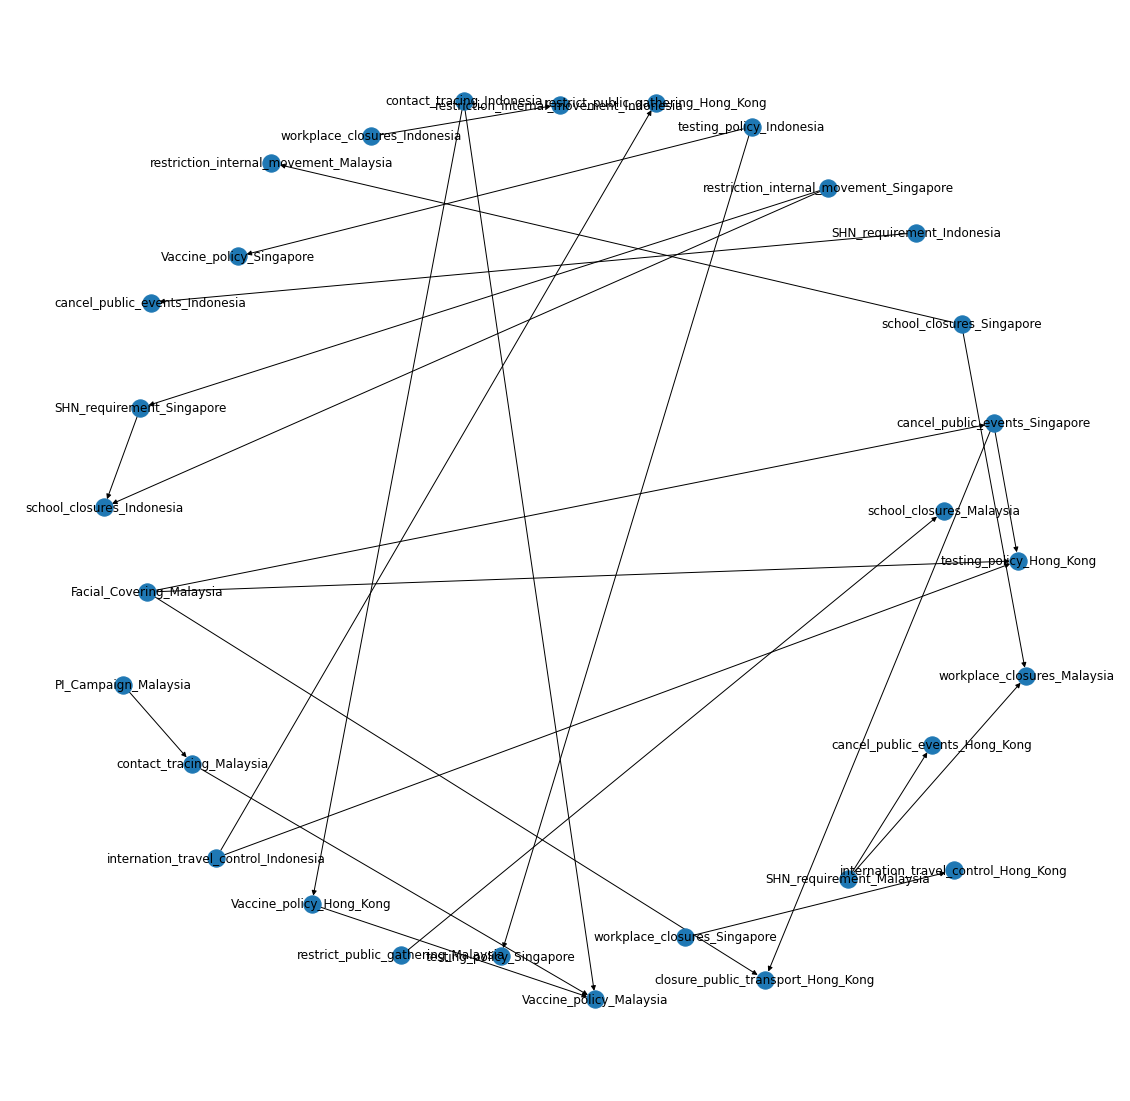

In [21]:
import networkx as nx
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1, figsize=(20,20))
nx.draw(estimated_model, with_labels=True, ax=ax)


#### Parameter Estimation

In [22]:
learnt_bn = BayesianNetwork(list(estimated_model.edges))

In [23]:
from pgmpy.estimators import MaximumLikelihoodEstimator
learnt_bn.fit(train_df, MaximumLikelihoodEstimator)

In [24]:
for cpd in learnt_bn.get_cpds():
    print(cpd)

+------------------------------+------------+
| SHN_requirement_Malaysia(0)  | 0.140152   |
+------------------------------+------------+
| SHN_requirement_Malaysia(1G) | 0.119318   |
+------------------------------+------------+
| SHN_requirement_Malaysia(1T) | 0.0890152  |
+------------------------------+------------+
| SHN_requirement_Malaysia(2G) | 0.208333   |
+------------------------------+------------+
| SHN_requirement_Malaysia(2T) | 0.439394   |
+------------------------------+------------+
| SHN_requirement_Malaysia(3T) | 0.00378788 |
+------------------------------+------------+
+---------------------------------+-----+-------------------------------+
| SHN_requirement_Malaysia        | ... | SHN_requirement_Malaysia(3T)  |
+---------------------------------+-----+-------------------------------+
| school_closures_Singapore       | ... | school_closures_Singapore(3G) |
+---------------------------------+-----+-------------------------------+
| workplace_closures_Malaysia(1T

#### Inferencing

In [38]:
# test_df[["closure_public_transport_Malaysia"]]
test_df[test_df["closure_public_transport_Malaysia"] == "1T"][["restrict_public_gathering_Malaysia", "school_closures_Malaysia"]]

,restrict_public_gathering_Malaysia,school_closures_Malaysia
528,4G,2T
529,4G,2T
530,4G,2T
531,4G,2T
532,4G,2T
533,4G,2T
534,4G,2T
535,4G,2T
536,4G,2T
537,4G,2T


In [26]:
from pgmpy.inference import VariableElimination

ve = VariableElimination(learnt_bn)

In [37]:
print(
    ve.query(
        ["restrict_public_gathering_Malaysia"], evidence={"school_closures_Malaysia": 1}
    )
)

0it [00:00, ?it/s]

0it [00:00, ?it/s]

+----------------------------------------+-------------------------------------------+
| restrict_public_gathering_Malaysia     |   phi(restrict_public_gathering_Malaysia) |
+========================================+===========================================+
| restrict_public_gathering_Malaysia(0)  |                                    0.0000 |
+----------------------------------------+-------------------------------------------+
| restrict_public_gathering_Malaysia(2G) |                                    0.6667 |
+----------------------------------------+-------------------------------------------+
| restrict_public_gathering_Malaysia(3G) |                                    0.0000 |
+----------------------------------------+-------------------------------------------+
| restrict_public_gathering_Malaysia(4G) |                                    0.0000 |
+----------------------------------------+-------------------------------------------+
| restrict_public_gathering_Malaysia(4T) | 